# **Facial Emotion Detection**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Importing the Libraries**

In [1]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing import image

### **Load the data**

In [3]:
# Storing the path of the data file from the Google drive
path = './Facial_emotion_images.zip'

# The data is provided as a zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualize Classes**


### **Happy**

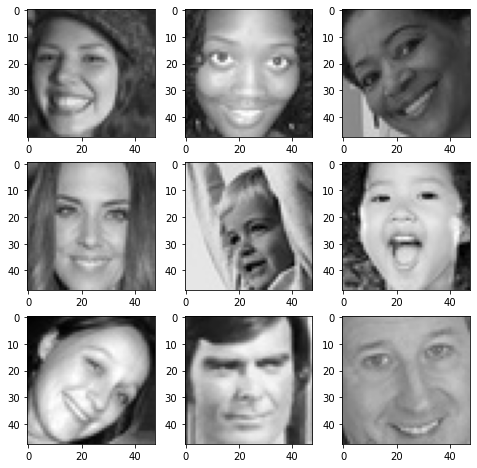

In [5]:
expression = 'happy'



plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    
    
    plt.imshow(img)   

plt.show()

happy_imgs = [fn for fn in os.listdir(f'{folder_path}train/{expression}')]


**Observations and Insights: 
- happy faces include both open mouths, closed mouths and smiles with teeth this could lead to issues with surprise faces
- Faces are photographed from different angles not always head on.
- Faces are also at different angles so model may benefit from rotating images
**

### **Sad**

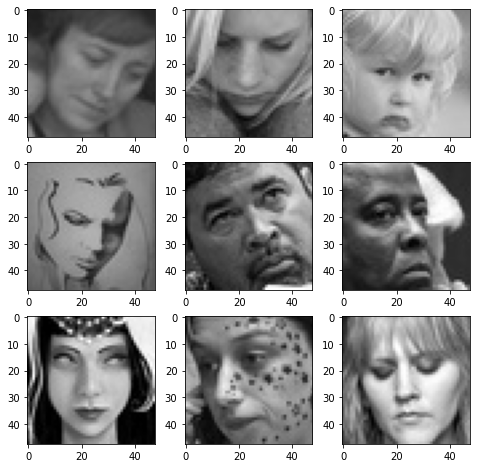

In [6]:
# Write your code to visualize images from the class 'sad'.
expression = 'sad'


plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    
    
    plt.imshow(img)   

plt.show()

sad_imgs = [fn for fn in os.listdir(f'{folder_path}train/{expression}')]

**Observations and Insights:
- Some of the pictures are drawings
- faces are turned down amd mot head on
- Mouth and eyes are fairly similar to neutral photos
- eyes are not visible in some of the photos


**

### **Neutral**

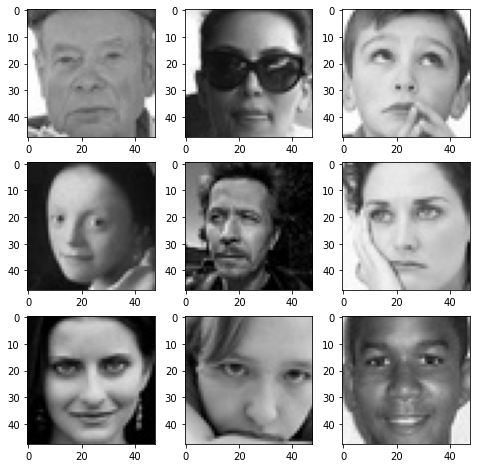

In [7]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

neutral_imgs = [fn for fn in os.listdir(f'{folder_path}train/{expression}')]

**Observations and Insights:
- eyes are obstructed by sunglasses in one photo and hands obstruct the face in others
- Neutral faces seem to coincide with the eyes and mouths of both sad and happy
- mouths are straight and some are even almost smiling
- faces are more straight on in this category than in others


**

### **Surprised**

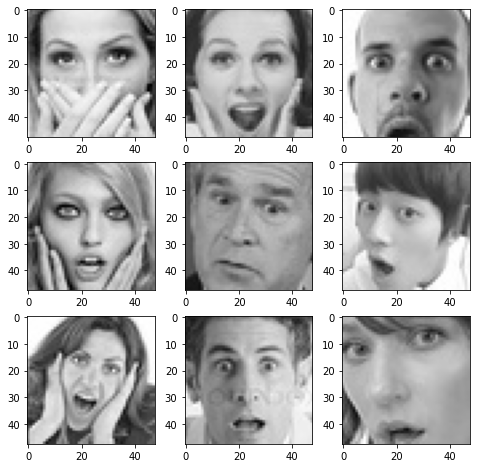

In [8]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

surprised_imgs = [fn for fn in os.listdir(f'{folder_path}train/{expression}')]

**Observations and Insights:
- Faces are often obstructed by hands
- Mouths are generally opened
- eyes are wide open similar to happy photos
- eyebrows are more curved than in happy sad or neutral



**

## **Checking Distribution of Classes**

In [9]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprised':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprised':    3173


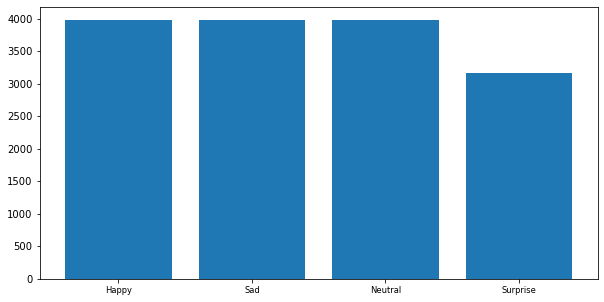

In [10]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

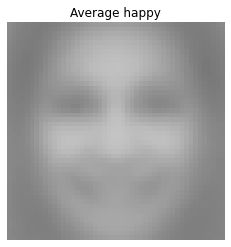

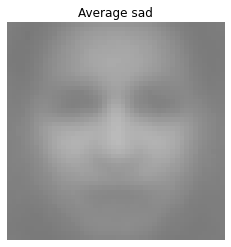

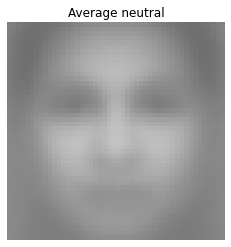

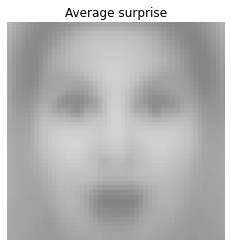

In [11]:
def img2np(path, list_of_filename, size = (48, 48)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

def find_mean_img(full_mat, title, size = (48, 48)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

happy_images = img2np(f'{folder_path}/train/happy/', happy_imgs)

happy_mean = find_mean_img(happy_images, 'happy')


sad_images = img2np(f'{folder_path}/train/sad/', sad_imgs)

sad_mean = find_mean_img(sad_images, 'sad')


neutral_images = img2np(f'{folder_path}/train/neutral/', neutral_imgs)

neutral_mean = find_mean_img(neutral_images, 'neutral')


surprised_images = img2np(f'{folder_path}/train/surprise/', surprised_imgs)

surprised_mean = find_mean_img(surprised_images, 'surprise')

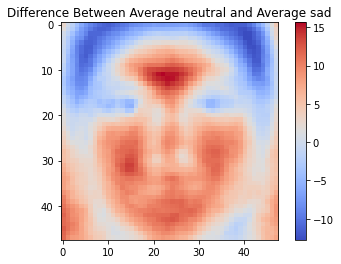

In [69]:
contrast_mean = neutral_mean - sad_mean
c = plt.imshow(contrast_mean, cmap='coolwarm')
plt.title(f'Difference Between Average neutral and Average sad')
plt.colorbar(c)

plt.show()

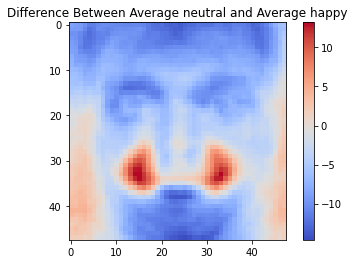

In [122]:
contrast_mean = neutral_mean - happy_mean
c = plt.imshow(contrast_mean, cmap='coolwarm')
plt.title(f'Difference Between Average neutral and Average happy')
plt.colorbar(c)

plt.show()

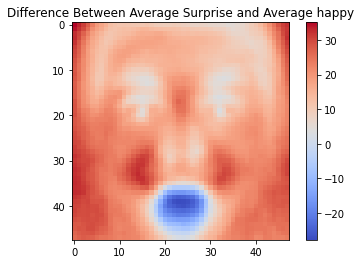

In [70]:
contrast_mean = surprised_mean - happy_mean
c = plt.imshow(contrast_mean, cmap='coolwarm')
plt.title(f'Difference Between Average Surprise and Average happy')
plt.colorbar(c)

plt.show()

**Observations and Insights: 
- There are almost 1000 fewer surprise pictures than any other category, all of the other classes are evenly distributed.
-  The average Suprised face appears to be the most clear out of all
- Average neutral and sad face look extremely similar with eyes and mouth. The eyes are almost closed and the mouth 
- Average Surprise has opened mouth, you can fully see eye pupils
- when contrasting neutral mean and sad mean the main difference is in the eyes
- average neutral and average happy the main difference is the edge of the lips
- average surprise and average happy differ mainly around the center of the mouth, but have very similar eyebrows

**

## **Creating Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

## **Model Building**

In [105]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_train.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_train.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Creating the Base Neural Network**

In [106]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [110]:
# Initializing a Sequential Model
model1 = Sequential()

# Add the first Convolutional block
model1.add(Conv2D(64, kernel_size = 2 , padding="same", activation="relu", input_shape=(48,48,1)))

model1.add(MaxPooling2D(pool_size=2))

model1.add(Dropout(0.2))

# Add the second Convolutional block
model1.add(Conv2D(32, kernel_size = 2 , padding="same", activation="relu"))

model1.add(MaxPooling2D(pool_size=2))

model1.add(Dropout(0.2))

# Add the third Convolutional block
model1.add(Conv2D(32, kernel_size = 2 , padding="same", activation="relu"))

model1.add(MaxPooling2D(pool_size=2))

model1.add(Dropout(0.2))
# Add the Flatten layer
model1.add(Flatten())
# Add the first Dense layer
model1.add(Dense(512, activation = "relu"))
model1.add(Dropout(0.4))
# Add the Final layer
model1.add(Dense(4, activation = "softmax"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 32)       

### **Compiling and Training the Model**

In [111]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [112]:
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [113]:
history = model1.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
473/473 [==============================] - 24s 50ms/step - loss: 1.3788 - accuracy: 0.2792 - val_loss: 1.3251 - val_accuracy: 0.3898
Epoch 2/20
473/473 [==============================] - 24s 50ms/step - loss: 1.2744 - accuracy: 0.4024 - val_loss: 1.1842 - val_accuracy: 0.4874
Epoch 3/20
473/473 [==============================] - 23s 49ms/step - loss: 1.1765 - accuracy: 0.4755 - val_loss: 1.1041 - val_accuracy: 0.5150
Epoch 4/20
473/473 [==============================] - 23s 49ms/step - loss: 1.1275 - accuracy: 0.5040 - val_loss: 1.0668 - val_accuracy: 0.5459
Epoch 5/20
473/473 [==============================] - 23s 49ms/step - loss: 1.0833 - accuracy: 0.5276 - val_loss: 1.0280 - val_accuracy: 0.5596
Epoch 6/20
473/473 [==============================] - 23s 49ms/step - loss: 1.0579 - accuracy: 0.5362 - val_loss: 0.9612 - val_accuracy: 0.5947
Epoch 7/20
473/473 [==============================] - 23s 49ms/step - loss: 1.0250 - accuracy: 0.5545 - val_loss: 0.9470 - val_accuracy:

### **Evaluating the Model on the Test Set**

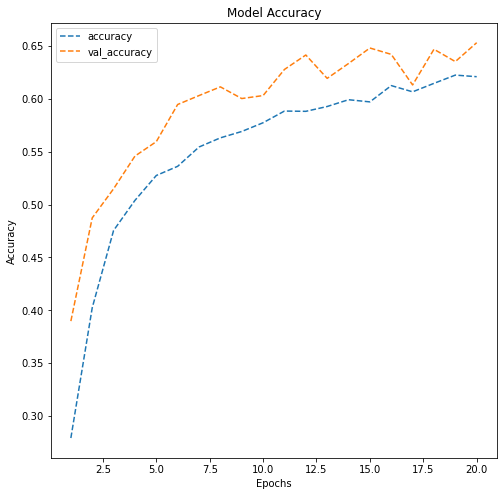

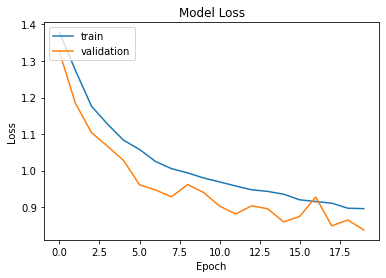

In [114]:
dict_hist = history.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))


plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

#plot loss of model1
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()




In [115]:
accuracy = model1.evaluate(test_set)

1/1 [==============================] - 0s 125ms/step - loss: 0.8480 - accuracy: 0.6250


4/4 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        32
           1       0.57      0.62      0.60        32
           2       0.44      0.53      0.48        32
           3       0.89      0.75      0.81        32

    accuracy                           0.62       128
   macro avg       0.64      0.62      0.62       128
weighted avg       0.64      0.62      0.62       128



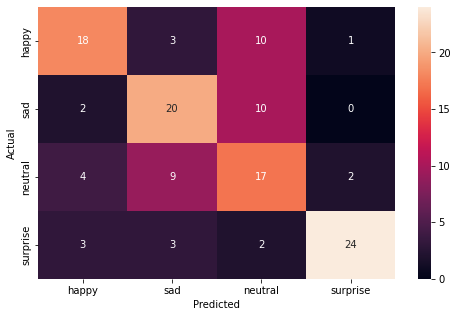

In [116]:
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model1.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:
-	The training accuracy on this model increases until about 17.5 epochs where it starts to level off at around 60% accuracy. This is acceptable but not Great.
-	The validation accuracy is a little noisy but ends up being closer to 65% accurate. This is fairly good but again could be better.
-	The validation accuracy being higher than the training accuracy tells that this model is generalizing well even with the fluctuations around 12 epochs.
-	The validation loss shows that the model is learning well. The validation loss remains under the training loss indicating that the model is not over fitting.
- the loss is fairly efficient it is trendning down and fairly stable 
- One interesting result from the confusion matrix shows that, although surprise had the least training data it did the best on the test data properly classifying 24/32 of the test data
- sad is the second most accurate with 20/32 of the pictures properly classified. It is often misclassified with neutral nearly 1/3 of the time This could be because the model is focusing on the shape of the mouth and the two have very similar mouth shapes according to the average image of each.
- happy is classified correctly 18/32 times, ot os also misclassified as neutral 1/3 of the time.
- neutral is the most misclassified only being accuratly classified 17/32 times. it is often classified as sad again this could be because the two are so similar and the model is focusing on the mouth shape. This is also shown in the precision where neutral is only 0.44
- the highest precision is for surprise
- The recall is also spread from .53 to .75, the model is struggling to identify neutral faces. 



**

In [117]:
from tensorflow.keras import backend

backend.clear_session()

In [118]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Creating the second Convolutional Neural Network**

In [30]:
# Creating sequential model
model2 = Sequential()
 
# Add the first Convolutional block
model2.add(Conv2D(256, kernel_size = 2 , padding="same", activation="relu", input_shape=(48,48,1)))

model2.add(BatchNormalization())

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size=2))

# Add the second Convolutional block
model2.add(Conv2D(128, kernel_size = 2 , padding="same", activation="relu"))

model2.add(BatchNormalization())

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size=2))
# Add the third Convolutional block
model2.add(Conv2D(64, kernel_size = 2 , padding="same", activation="relu"))

model2.add(BatchNormalization())

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size=2))
# Add the fourth Convolutional block
model2.add(Conv2D(32, kernel_size = 2, padding="same"))
# Add the Flatten layer
model2.add(Flatten())
# Adding the Dense layers
model2.add(Dense(512, activation= "relu"))
model2.add(Dense(128, activation= "relu"))
model2.add(Dense(4, activation= "softmax"))


model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')


early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [32]:
# Write your code to compile your model2. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics as 'accuracy'.

optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history2 = model2.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
473/473 [==============================] - 113s 236ms/step - loss: 1.2236 - accuracy: 0.4480 - val_loss: 1.2389 - val_accuracy: 0.4874
Epoch 2/20
473/473 [==============================] - 112s 236ms/step - loss: 1.0116 - accuracy: 0.5607 - val_loss: 1.0314 - val_accuracy: 0.5457
Epoch 3/20
473/473 [==============================] - 111s 235ms/step - loss: 0.9389 - accuracy: 0.5894 - val_loss: 1.0386 - val_accuracy: 0.5570
Epoch 4/20
473/473 [==============================] - 112s 236ms/step - loss: 0.8850 - accuracy: 0.6176 - val_loss: 1.0437 - val_accuracy: 0.5298
Epoch 5/20
473/473 [==============================] - 112s 237ms/step - loss: 0.8366 - accuracy: 0.6444 - val_loss: 0.8565 - val_accuracy: 0.6405
Epoch 6/20
473/473 [==============================] - 114s 240ms/step - loss: 0.7902 - accuracy: 0.6642 - val_loss: 0.8622 - val_accuracy: 0.6422
Epoch 7/20
473/473 [==============================] - 113s 239ms/step - loss: 0.7527 - accuracy: 0.6842 - val_loss: 0.9026 -

### **Evaluating the Model on the Test Set**

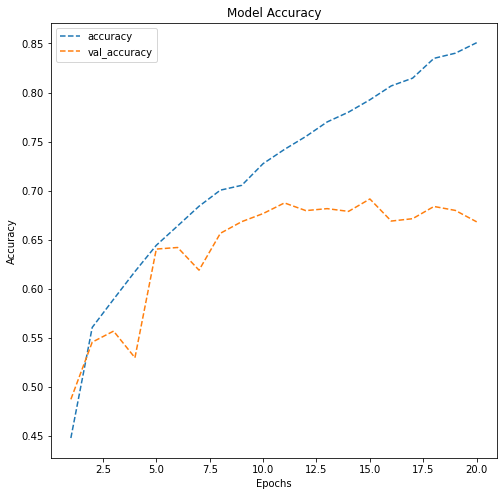

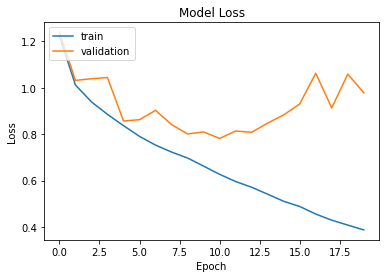

In [71]:
# Write your code to evaluate model's test performance

dict_hist = history2.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))


plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()


#plot loss of model1
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [120]:
accuracy = model1.evaluate(test_set)

1/1 [==============================] - 0s 163ms/step - loss: 0.8396 - accuracy: 0.6406


4/4 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        32
           1       0.54      0.66      0.59        32
           2       0.44      0.50      0.47        32
           3       0.89      0.75      0.81        32

    accuracy                           0.62       128
   macro avg       0.64      0.62      0.62       128
weighted avg       0.64      0.62      0.62       128



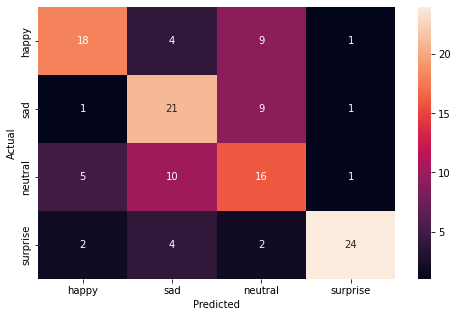

In [121]:
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model1.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))
# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights: 
-	The training accuracy on this model goes up to nearly 90% while the validation accuracy remains around 67%. This indicates that the model is over fitting the training data significantly. I believe the model is too complex.
-	Decreasing the number of filters and removing a layer or two could fix the over fitting of the model
-	The validation loss also indicates that there is significant over fitting in the model
-	After 5 epochs the model stops learning almost all together on the validation data but keeps a smooth decrease in loss on the training data
- this model could also be fixed with some regularization
- the f1 score on this model fluctuates less and is better than model one, but it is stillnot great
- the accuracy is almost the exact same as model 1
- the confustion matrix shows that surprise is once agian the most accurately classified (24/32) which is interesting because the surprise had the least training data. This could be beucause the average mouth on surprise is so different from the average mouth on the other faces
- Neutral is slightly less accurate on this model, classifying 16/32 correctly, but again nearly 1/3 of the time misclassifying as sad
- sad is correctly classified 21/32 times similar to model 1, again nearly 1/3 of the time it is misclassified as neutral
- happy is classified correctly 18/32 times, this is the same as model1 and also is misclassified in the same category neutral the most.
- recall and precision are nearly the exact same as model 1 in this case. 
- This means that model 2 is still struggling to identify neutral faces and distinguish the difference between sad and nuetral as well as happy and neutral. 
- really both models only perform well on surprise face and i believe this is because it is focusing mainly on the shape of the mouth and eyebrows, which is where surprise faces are significantly different from the other categories
- I would select model 1 in this case because i believe it is catching patterns better and generalizing better, even thought the accuracies are almost the same on both models.
- Model 1 was almost satisfactory but the accuracy could be better. Model 2 was not satisfactory as it was over fitting the training data and did not get much more accurate. 
- I did not end up using RGB because i got nearly the same results on accuracy and loss for both grayscale and rgb colormodes to the point where it could have just been the randomness that was dictating these results. I believe RGB would not make a different result because the images would still be grayscaled in RGB color mode. Even iff the pictures were in color I dont think it would make much of a difference in the accuracyt of the model because the color of the face doesnt have much to do with emotions.
**